In [39]:
################################# Importing the dataset ###########################################################

# import necessary libraries and specify that graphs should be plotted inline. 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import neighbors, datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import scikitplot as skplt


#loading the dataset
names = names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean",
               "compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean",
               "radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se",
               "concave points_se",	"symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst",
               "area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst",
               "symmetry_worst","fractal_dimension_worst"]
data =pd.read_csv("C:\\Users\\Anirudh\\Desktop\\Predictive Analytics\\Assignment\\HW 1\\wdbc.data",header=None,names=names)
data.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
## Explore the data set
n_samples, n_features = data.shape
print ('The dimensions of the data set are', n_samples, 'by', n_features)

The dimensions of the data set are 569 by 32


In [6]:
#split dataset in features and target variable
X = data.iloc[:,2:32]# Features
y = data.diagnosis # Target variable

#Test_train_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 25)

In [7]:
#################################################### Logistic Regression ########################################################

# Hypertuning the model using cross validation
penalty = ['l1','l2']
c= np.arange (0.5, 10.5, 0.5)

param_grid = dict(penalty = penalty,C=c)
print(param_grid)

{'penalty': ['l1', 'l2'], 'C': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])}


In [8]:
Logistic_model = linear_model.LogisticRegression()

grid = GridSearchCV(Logistic_model, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_train,y_train)

C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number o

C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to s

C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number o

C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to s

C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to s

C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of 

C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sil

C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to s

C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number o

C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to s

C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number o

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [9]:
# Displaying the results for the best fit model 

print ('The Best score is ', grid.best_score_)
print ('The Best parameter is ', grid.best_params_)
print ('The best estimator is ', grid.best_estimator_)

The Best score is  0.9723618090452262
The Best parameter is  {'C': 6.5, 'penalty': 'l1'}
The best estimator is  LogisticRegression(C=6.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [10]:
#final best fit model fit on the entire dataset 
logic_clf = grid.best_estimator_
logic_clf.fit(X_train,y_train)
#Prediction using the fitted model
predicted = logic_clf.predict(X_test)

C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [11]:
# Accuracy, classification report and confusion matrix of the fitted model
print("Prediction Accuracy is ",accuracy_score(y_test, predicted))
print("Classification report is ",classification_report(y_test, predicted))
print("Confusion matrix is ",confusion_matrix(y_test, predicted))

Prediction Accuracy is  0.9239766081871345
Classification report is                precision    recall  f1-score   support

           B       0.94      0.95      0.94       113
           M       0.89      0.88      0.89        58

   micro avg       0.92      0.92      0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171

Confusion matrix is  [[107   6]
 [  7  51]]


In [1]:
y_true, y_pred = y_test, predicted


# ground truth labels
y_probas =  logic_clf.predict_proba(X_test) # predicted probabilities generated by klearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

NameError: name 'y_test' is not defined

C:\Users\Anirudh\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


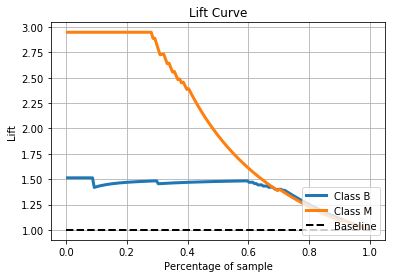

In [17]:
skplt.metrics.plot_lift_curve(y_true, y_probas)
plt.show()

In [18]:
#################################################### Decision Tree ########################################################

# Optimize decision tree simultaneously trying to detect over-fitting 
depth_range = list(range(2,25))
method = ["gini", "entropy"]
param_grid = dict(max_depth = depth_range, criterion = method)
print (param_grid)

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'criterion': ['gini', 'entropy']}


In [19]:
tree_clf = tree.DecisionTreeClassifier()

grid = GridSearchCV(tree_clf, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_train,y_train)
#checking for 10 fold cross validation

print ('The Best score is ', grid.best_score_)
print ('The Best parameter is ', grid.best_params_)
print ('The best estimator is ', grid.best_estimator_)
print("Prediction Accuracy is ",accuracy_score(y_test, grid.predict(X_test)))

The Best score is  0.9371859296482412
The Best parameter is  {'criterion': 'gini', 'max_depth': 21}
The best estimator is  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=21,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Prediction Accuracy is  0.9239766081871345


C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [20]:
#Best fit model
best_tree_clf = grid.best_estimator_
best_tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=21,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
predicted_model = best_tree_clf.predict(X_test)

print("Prediction Accuracy is ",accuracy_score(y_test, predicted_model))
print("Classification report is ",classification_report(y_test, predicted_model))
print("Confusion matrix is",confusion_matrix(y_test, predicted_model))

Prediction Accuracy is  0.9122807017543859
Classification report is                precision    recall  f1-score   support

           B       0.93      0.94      0.93       113
           M       0.88      0.86      0.87        58

   micro avg       0.91      0.91      0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171

Confusion matrix is [[106   7]
 [  8  50]]


C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


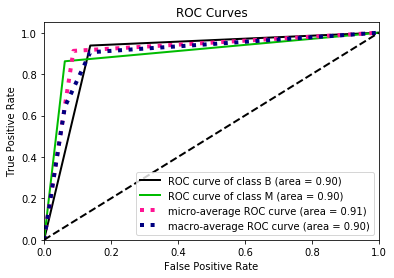

In [24]:
y_true, y_pred = y_test, predicted_model


# ground truth labels
y_probas =  best_tree_clf.predict_proba(X_test) # predicted probabilities generated by klearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

C:\Users\Anirudh\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


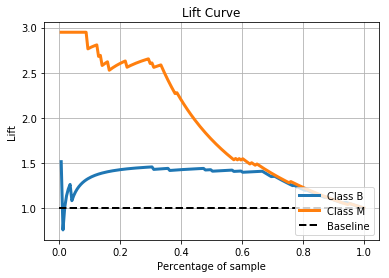

In [25]:
skplt.metrics.plot_lift_curve(y_true, y_probas)
plt.show()

In [26]:
#################################################### KNN Classifier ########################################################

#Pre-processing the data and scaling data 
scaled_dataset = MinMaxScaler(feature_range=(0, 1)) #using Min-Max scaler

# for training dataset
x_train_scaled = scaled_dataset.fit_transform(X_train)
x_train = pd.DataFrame(x_train_scaled)

# repeating for the test dataset 
x_test_scaled = scaled_dataset.fit_transform(X_test)
x_test = pd.DataFrame(x_test_scaled)

In [27]:
# Optimize the KNN model by hypertuning using cross validation
# Different parameters for tuning the model
neighbours_range = list(range(1,30))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors=neighbours_range, weights= weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance']}


In [28]:
# the model itself 
model = neighbors.KNeighborsClassifier()

grid = GridSearchCV(model, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(x_train,y_train)

C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [29]:
# Displaying the best fit classifier
print ('The Best score is ', grid.best_score_)
print ('The Best parameter is ', grid.best_params_)
print ('The best estimator is ', grid.best_estimator_)

The Best score is  0.9673366834170855
The Best parameter is  {'n_neighbors': 5, 'weights': 'uniform'}
The best estimator is  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


In [33]:
# Best fit model
knn_clf = grid.best_estimator_
knn_clf.fit(x_train,y_train)
predicted = knn_clf.predict(x_test)

In [31]:
# Final accuracy, classification report and confusion matrix of the fitted model
print("Prediction Accuracy: ",accuracy_score(y_test, predicted))
print("Classification_report",classification_report(y_test, predicted))
print("Confusion_matrix",confusion_matrix(y_test, predicted))

Prediction Accuracy:  0.9473684210526315
Classification_report               precision    recall  f1-score   support

           B       0.98      0.94      0.96       113
           M       0.89      0.97      0.93        58

   micro avg       0.95      0.95      0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

Confusion_matrix [[106   7]
 [  2  56]]


C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


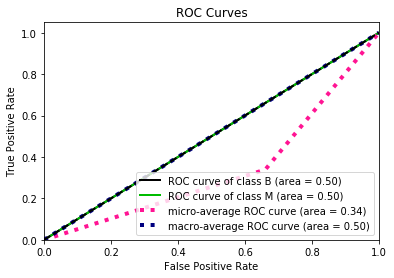

In [35]:
y_true, y_pred = y_test, predicted

# ground truth labels
y_probas =  knn_clf.predict_proba(X_test) # predicted probabilities generated by klearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

C:\Users\Anirudh\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


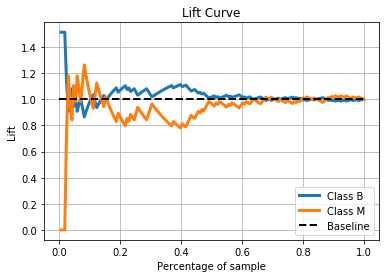

In [36]:
skplt.metrics.plot_lift_curve(y_true, y_probas)
plt.show()

In [37]:
#################################################### SVM Classifier ########################################################

X = data.iloc[:,2:32]# Features
y = data.diagnosis # Target variable

#Pre-processing the data and scaling data 
scaled_dataset = MinMaxScaler(feature_range=(0, 1)) #using Min-Max scaler
X = scaled_dataset.fit_transform(X)


#Test_train_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 25)

In [40]:

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.


# Tuning hyper-parameters for precision



C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anirudh\Anaconda3\lib\site-packages

Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Grid scores on development set:

0.307 (+/-0.001) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.307 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.921 (+/-0.030) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.307 (+/-0.001) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.960 (+/-0.053) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.921 (+/-0.030) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.978 (+/-0.025) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.960 (+/-0.053) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.975 (+/-0.028) for {'C': 1, 'kernel': 'linear'}
0.980 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.969 (+/-0.021) for {'C': 100, 'kernel': 'linear'}
0.964 (+/-0.062) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision   

In [41]:
# tuning the parameters close to 10 C 
tuned_parameters = [{'kernel': ['linear'], 'C': [3, 4,6,8,10,12,15,20,25,40,60]}]

scores = ['recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 6, 'kernel': 'linear'}

Grid scores on development set:

0.973 (+/-0.033) for {'C': 3, 'kernel': 'linear'}
0.976 (+/-0.029) for {'C': 4, 'kernel': 'linear'}
0.980 (+/-0.023) for {'C': 6, 'kernel': 'linear'}
0.980 (+/-0.023) for {'C': 8, 'kernel': 'linear'}
0.973 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.970 (+/-0.017) for {'C': 12, 'kernel': 'linear'}
0.968 (+/-0.012) for {'C': 15, 'kernel': 'linear'}
0.971 (+/-0.017) for {'C': 20, 'kernel': 'linear'}
0.968 (+/-0.023) for {'C': 25, 'kernel': 'linear'}
0.978 (+/-0.016) for {'C': 40, 'kernel': 'linear'}
0.969 (+/-0.034) for {'C': 60, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           B       0.97      1.00      0.99       113
           M       1.00      0.95      0.97      

In [42]:
print ('The Best score is ', clf.best_score_)
print ('The Best parameter is ', clf.best_params_)
print ('The best estimator is ', clf.best_estimator_)
print("Prediction Accuracy is ",accuracy_score(y_test, clf.predict(X_test)))
predicted_model = clf.predict(X_test)
print("Classification report is ",classification_report(y_test, predicted_model))
print("Confusion matrix is",confusion_matrix(y_test, predicted_model))

The Best score is  0.9796391437106533
The Best parameter is  {'C': 6, 'kernel': 'linear'}
The best estimator is  SVC(C=6, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Prediction Accuracy is  0.9824561403508771
Classification report is                precision    recall  f1-score   support

           B       0.97      1.00      0.99       113
           M       1.00      0.95      0.97        58

   micro avg       0.98      0.98      0.98       171
   macro avg       0.99      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

Confusion matrix is [[113   0]
 [  3  55]]


C:\Users\Anirudh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


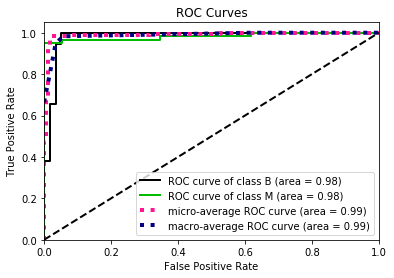

In [43]:
model = svm.SVC(probability=True,kernel = 'linear',C = 6)
model.fit(X_train, y_train)
y_true, y_pred = y_test, model.predict(X_test)

# ground truth labels
y_probas =  model.predict_proba(X_test) # predicted probabilities generated by klearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

C:\Users\Anirudh\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


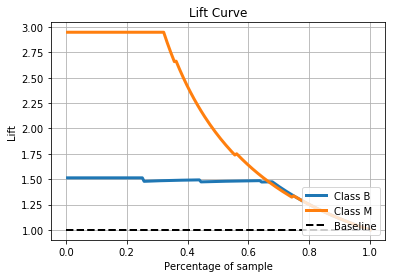

In [44]:
skplt.metrics.plot_lift_curve(y_true, y_probas)
plt.show()